In [2]:
import duckdb
cn = duckdb.connect()
cn.execute("install tpch; load tpch")

In [3]:
cn.execute("call dbgen(sf=1)")

In [5]:
cn.sql("from orders limit 5").show()

┌────────────┬───────────┬───────────────┬───────────────┬─────────────┬─────────────────┬─────────────────┬────────────────┬───────────────────────────────────────────────────────────────────────────┐
│ o_orderkey │ o_custkey │ o_orderstatus │ o_totalprice  │ o_orderdate │ o_orderpriority │     o_clerk     │ o_shippriority │                                 o_comment                                 │
│   int64    │   int64   │    varchar    │ decimal(15,2) │    date     │     varchar     │     varchar     │     int32      │                                  varchar                                  │
├────────────┼───────────┼───────────────┼───────────────┼─────────────┼─────────────────┼─────────────────┼────────────────┼───────────────────────────────────────────────────────────────────────────┤
│          1 │     36901 │ O             │     173665.47 │ 1996-01-02  │ 5-LOW           │ Clerk#000000951 │              0 │ ly express platelets. deposits acc                                

In [ ]:
import matplotlib.pyplot as plt

<Figure size 640x480 with 0 Axes>

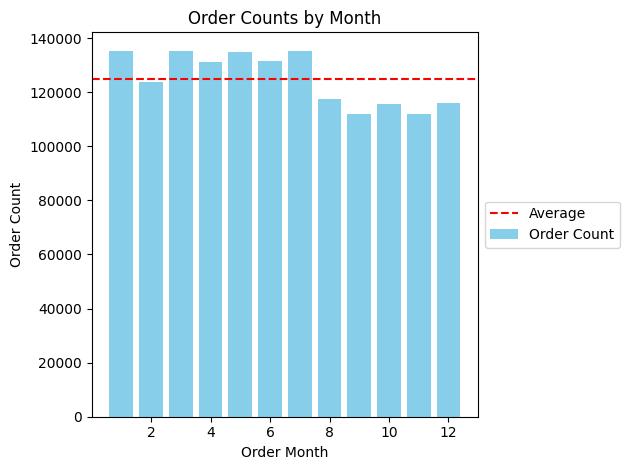

In [ ]:
sql = """
    select month(o_orderdate) as ord_mth
        ,count(distinct o_orderkey) as ord_cnt
    from orders
    group by all
"""

# Get the result as a DataFrame
df = cn.sql(sql).df()

# Plot bar chart
plt.bar(df['ord_mth'], df['ord_cnt'], color='skyblue', label='Order Count')

# Plot average trendline
avg = df['ord_cnt'].mean()
plt.axhline(avg, color='red', linestyle='--', label='Average')

plt.clf()
fig, ax = plt.subplots()
ax.bar(df['ord_mth'], df['ord_cnt'], color='skyblue', label='Order Count')
ax.axhline(avg, color='red', linestyle='--', label='Average')
ax.set_xlabel('Order Month')
ax.set_ylabel('Order Count')
ax.set_title('Order Counts by Month')
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
fig.tight_layout()
plt.show()